In [97]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [98]:
# Load dataset
df = pd.read_csv("dataset.csv")

# Convert 'Date' to datetime and ordinal
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Check for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   level_0       1258 non-null   int64              
 1   index         1258 non-null   int64              
 2   Date          1258 non-null   datetime64[ns, UTC]
 3   Open          1258 non-null   float64            
 4   High          1258 non-null   float64            
 5   Low           1258 non-null   float64            
 6   Close         1258 non-null   float64            
 7   Volume        1258 non-null   int64              
 8   Dividends     1258 non-null   float64            
 9   Stock Splits  1258 non-null   float64            
 10  Date_ordinal  1258 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(4)
memory usage: 108.2 KB
None
level_0         0
index           0
Date            0
Open            0
High            0
Low    

In [99]:
# Prepare features and target variable
X = df[['Date_ordinal']].values
y = df['Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [100]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse_score)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 22.840893794433526
R² Score: 0.9957406504003925


In [101]:
# Create DataFrame for plotting
test_df = pd.DataFrame({
    'Date_ordinal': X_test.flatten(),
    'Actual': y_test,
    'Predicted': y_pred
})
test_df['Date'] = test_df['Date_ordinal'].apply(pd.Timestamp.fromordinal)

# Reshape for lineplot
df_long = test_df.melt(id_vars="Date", value_vars=["Actual", "Predicted"],
                       var_name="Type", value_name="Price")

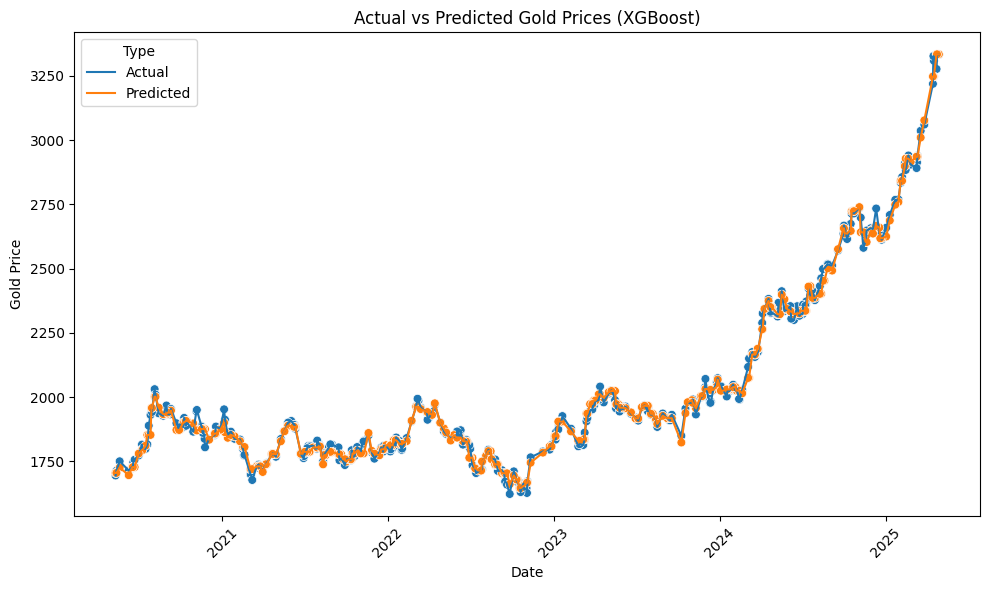

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Date", y="Price", hue="Type", estimator=None)
sns.scatterplot(data=df_long, x="Date", y="Price", hue="Type", legend=False, marker='o', s=40)
plt.title("Actual vs Predicted Gold Prices (XGBoost)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

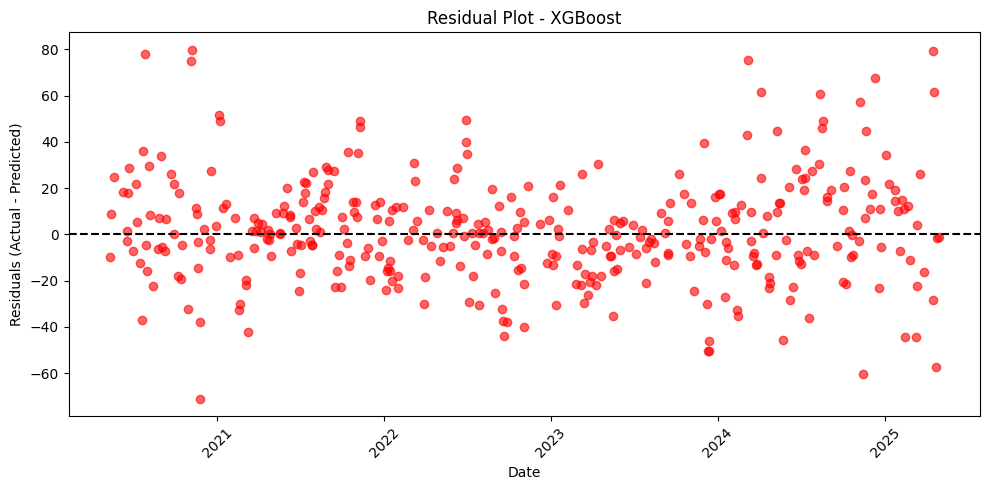

In [103]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(test_df['Date'], residuals, color='red', alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residual Plot - XGBoost")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()